### Codigo para coeficientes de Fresnel

In [1]:
# Aqui cargamos las liberias a usar
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import quad
from scipy import optimize

In [10]:
## Coeficientes de fresnel plano paralelo al campo
Eio = 1
n1 = 1.3145 #agua
n2 = 1.4987 #BK7
theta_i = np.arange(0,90,0.1) #grados
theta_t = 20 # grados

gamma_par = (n2 * np.cos(theta_t * 3.1415926 / 180) - n1 * np.cos(theta_i * 3.1415926 / 180))/(n1 * np.cos(theta_i * 3.1415926 / 180) + n2 * np.cos(theta_t * 3.1415926 / 180))
tau_par = (2 * n2 * np.cos(theta_i * 3.1415926 / 180)) / (n2  *np.cos(theta_t * 3.1415926 / 180) + n1 * np.cos(theta_i * 3.1415926 / 180))



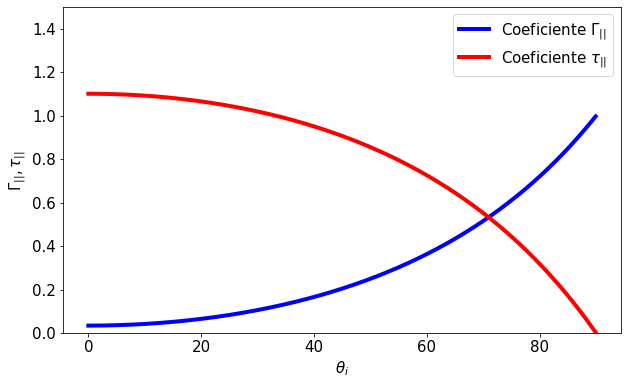

In [25]:
plt.plot(theta_i, gamma_par, "-", color = 'blue', lw = 4, label="Coeficiente $\Gamma_{||}$")
plt.plot(theta_i, tau_par, "-", color = 'red', lw = 4, label="Coeficiente $τ_{||}$")
plt.xlabel("$θ_i$")
plt.ylabel("$\Gamma_{||}, τ_{||}$")
plt.ylim(0, 1.5)
plt.rcParams ["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size':15})
plt.legend()

In [40]:
## Coeficientes de fresnel plano perpendicular al campo
Eio = 1
n1 = 1.3145 # agua
n2 = 1.4987 #BK7
theta_i = np.arange(0,90,0.1) #grados
theta_t = 20 # grados

gamma_per = (n1 * np.cos(theta_i * 3.1415926 / 180) - n2 * np.cos(theta_t * 3.1415926 / 180))/(n1 * np.cos(theta_i * 3.1415926 / 180) + n2 * np.cos(theta_t * 3.1415926 / 180))
tau_per = (2 * n1 * np.cos(theta_i * 3.1415926 / 180)) / (n1  *np.cos(theta_i * 3.1415926 / 180) + n2 * np.cos(theta_t * 3.1415926 / 180))

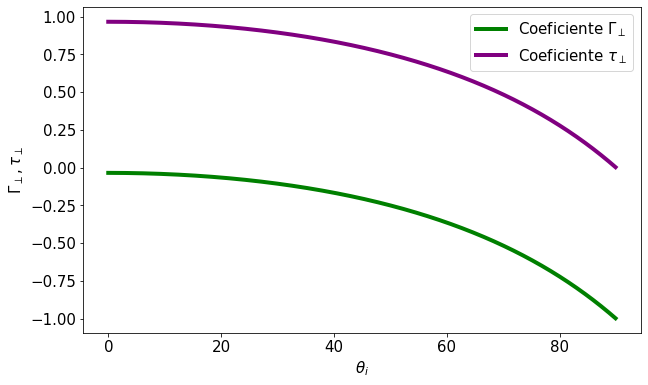

In [42]:
plt.plot(theta_i, gamma_per, "-", color = 'green', lw = 4, label="Coeficiente $\Gamma_{\perp}$")
plt.plot(theta_i, tau_per, "-", color = 'purple', lw = 4, label="Coeficiente $τ_{\perp}$")
plt.xlabel("$θ_i$")
plt.ylabel("$\Gamma_{\perp}, τ_{\perp}$")
##plt.ylim(0, 1.5)
plt.rcParams ["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size':15})
plt.legend()

### Codigo para coeficientes de Fresnel aire - (BK7, SU8, PMMA y Silica Fundida)

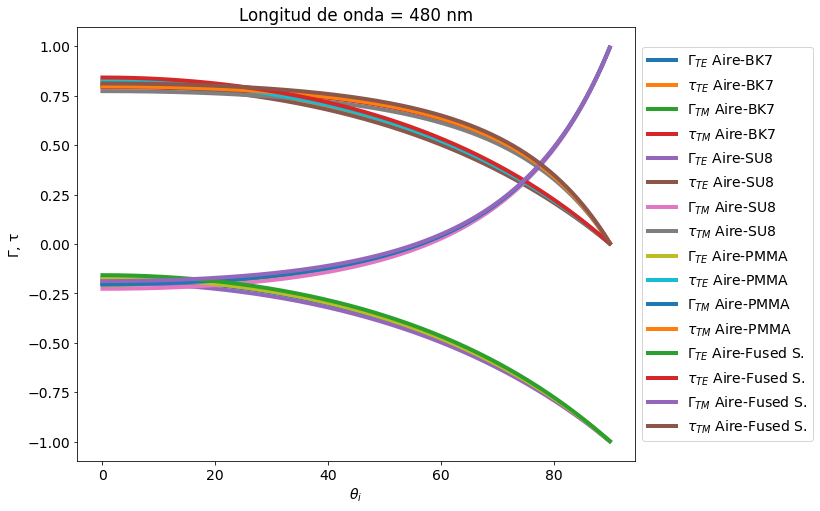

In [27]:
## Coeficientes de fresnel para longitud de onda de 480 nm

n1 = 1.00027954 # aire
n2_1 = 1.5228 #BK7
n2_2 = 1.5873 # SU8
n2_3 = 1.5093 # PMMA
n2_4 = 1.4635 # Fused S.

#indice de refraccion relativo
n_1 = n2_1/n1
n_2 = n2_2/n1
n_3 = n2_3/n1
n_4 = n2_4/n1

theta_i = np.arange(0,90,0.1) #grados
theta_t = 20 # grados

gamma_te_1 = (np.cos(theta_i * 3.1415926 / 180) - n_1 * np.cos(theta_t* 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_1 * np.cos(theta_t* 3.1415926 / 180)) 
tau_te_1 = (2 * np.cos(theta_i * 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_1 * np.cos(theta_t * 3.1415926 / 180))
gamma_tm_1 = (-n_1**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_1**2 - np.sin(theta_i * 3.1415926 / 180)**2))/(n_1**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_1**2 - np.sin(theta_i * 3.1415926 / 180)**2))
tau_tm_1 = (2*n_1 * np.cos(theta_i * 3.1415926 / 180))/(n_1**2 * np.cos(theta_i * 3.1415926 / 180) + np.sqrt(n_1**2 - np.sin(theta_i * 3.1415926 / 180)**2))

gamma_te_2 = (np.cos(theta_i * 3.1415926 / 180) - n_2 * np.cos(theta_t* 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_2 * np.cos(theta_t* 3.1415926 / 180)) 
tau_te_2 = (2 * np.cos(theta_i * 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_2 * np.cos(theta_t * 3.1415926 / 180))
gamma_tm_2 = (-n_2**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_2**2 - np.sin(theta_i * 3.1415926 / 180)**2))/(n_2**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_2**2 - np.sin(theta_i * 3.1415926 / 180)**2))
tau_tm_2 = (2*n_2 * np.cos(theta_i * 3.1415926 / 180))/(n_2**2 * np.cos(theta_i * 3.1415926 / 180) + np.sqrt(n_2**2 - np.sin(theta_i * 3.1415926 / 180)**2))

gamma_te_3 = (np.cos(theta_i * 3.1415926 / 180) - n_3 * np.cos(theta_t* 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_3 * np.cos(theta_t* 3.1415926 / 180)) 
tau_te_3 = (2 * np.cos(theta_i * 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_3 * np.cos(theta_t * 3.1415926 / 180))
gamma_tm_3 = (-n_3**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_3**2 - np.sin(theta_i * 3.1415926 / 180)**2))/(n_3**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_3**2 - np.sin(theta_i * 3.1415926 / 180)**2))
tau_tm_3 = (2*n_3 * np.cos(theta_i * 3.1415926 / 180))/(n_3**2 * np.cos(theta_i * 3.1415926 / 180) + np.sqrt(n_3**2 - np.sin(theta_i * 3.1415926 / 180)**2))

gamma_te_4 = (np.cos(theta_i * 3.1415926 / 180) - n_4 * np.cos(theta_t* 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_4 * np.cos(theta_t* 3.1415926 / 180)) 
tau_te_4 = (2 * np.cos(theta_i * 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_4 * np.cos(theta_t * 3.1415926 / 180))
gamma_tm_4 = (-n_4**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_4**2 - np.sin(theta_i * 3.1415926 / 180)**2))/(n_4**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_4**2 - np.sin(theta_i * 3.1415926 / 180)**2))
tau_tm_4 = (2*n_4 * np.cos(theta_i * 3.1415926 / 180))/(n_4**2 * np.cos(theta_i * 3.1415926 / 180) + np.sqrt(n_4**2 - np.sin(theta_i * 3.1415926 / 180)**2))

ax = plt.subplot(111)

plt.plot(theta_i, gamma_te_1, "-", lw = 4, label="$\Gamma_{TE}$ Aire-BK7")
plt.plot(theta_i, tau_te_1, "-", lw = 4, label="$τ_{TE}$ Aire-BK7")
plt.plot(theta_i, gamma_tm_1, "-", lw = 4, label="$\Gamma_{TM}$ Aire-BK7")
plt.plot(theta_i, tau_tm_1, "-", lw = 4, label="$τ_{TM}$ Aire-BK7")

plt.plot(theta_i, gamma_te_2, "-", lw = 4, label="$\Gamma_{TE}$ Aire-SU8")
plt.plot(theta_i, tau_te_2, "-", lw = 4, label="$τ_{TE}$ Aire-SU8")
plt.plot(theta_i, gamma_tm_2, "-", lw = 4, label="$\Gamma_{TM}$ Aire-SU8")
plt.plot(theta_i, tau_tm_2, "-", lw = 4, label="$τ_{TM}$ Aire-SU8")

plt.plot(theta_i, gamma_te_3, "-", lw = 4, label="$\Gamma_{TE}$ Aire-PMMA")
plt.plot(theta_i, tau_te_3, "-", lw = 4, label="$τ_{TE}$ Aire-PMMA")
plt.plot(theta_i, gamma_tm_3, "-", lw = 4, label="$\Gamma_{TM}$ Aire-PMMA")
plt.plot(theta_i, tau_tm_3, "-", lw = 4, label="$τ_{TM}$ Aire-PMMA")

plt.plot(theta_i, gamma_te_4, "-", lw = 4, label="$\Gamma_{TE}$ Aire-Fused S.")
plt.plot(theta_i, tau_te_4, "-", lw = 4, label="$τ_{TE}$ Aire-Fused S.")
plt.plot(theta_i, gamma_tm_4, "-", lw = 4, label="$\Gamma_{TM}$ Aire-Fused S.")
plt.plot(theta_i, tau_tm_4, "-", lw = 4, label="$τ_{TM}$ Aire-Fused S.")

plt.xlabel("$θ_i$")
plt.ylabel("$\Gamma}$, τ")
plt.ylim(-1.1, 1.1)
plt.rcParams ["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size':14})
plt.legend()
plt.title('Longitud de onda = 480 nm')
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

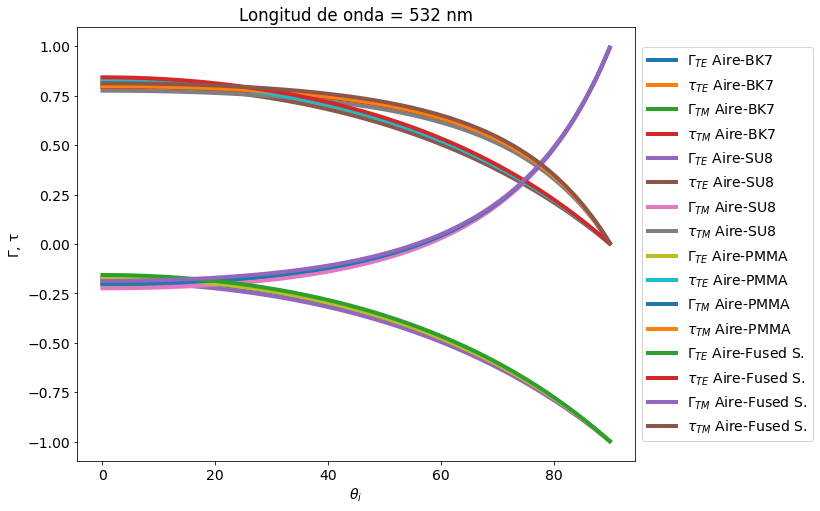

In [28]:
## Coeficientes de fresnel para longitud de onda de 532 nm

n1 = 1.00027821 # aire
n2_1 = 1.5195 #BK7
n2_2 = 1.5797 # SU8
n2_3 = 1.5054 # PMMA
n2_4 = 1.4607 # Fused S.

#indice de refraccion relativo
n_1 = n2_1/n1
n_2 = n2_2/n1
n_3 = n2_3/n1
n_4 = n2_4/n1

theta_i = np.arange(0,90,0.1) #grados
theta_t = 20 # grados

gamma_te_1 = (np.cos(theta_i * 3.1415926 / 180) - n_1 * np.cos(theta_t* 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_1 * np.cos(theta_t* 3.1415926 / 180)) 
tau_te_1 = (2 * np.cos(theta_i * 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_1 * np.cos(theta_t * 3.1415926 / 180))
gamma_tm_1 = (-n_1**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_1**2 - np.sin(theta_i * 3.1415926 / 180)**2))/(n_1**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_1**2 - np.sin(theta_i * 3.1415926 / 180)**2))
tau_tm_1 = (2*n_1 * np.cos(theta_i * 3.1415926 / 180))/(n_1**2 * np.cos(theta_i * 3.1415926 / 180) + np.sqrt(n_1**2 - np.sin(theta_i * 3.1415926 / 180)**2))

gamma_te_2 = (np.cos(theta_i * 3.1415926 / 180) - n_2 * np.cos(theta_t* 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_2 * np.cos(theta_t* 3.1415926 / 180)) 
tau_te_2 = (2 * np.cos(theta_i * 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_2 * np.cos(theta_t * 3.1415926 / 180))
gamma_tm_2 = (-n_2**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_2**2 - np.sin(theta_i * 3.1415926 / 180)**2))/(n_2**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_2**2 - np.sin(theta_i * 3.1415926 / 180)**2))
tau_tm_2 = (2*n_2 * np.cos(theta_i * 3.1415926 / 180))/(n_2**2 * np.cos(theta_i * 3.1415926 / 180) + np.sqrt(n_2**2 - np.sin(theta_i * 3.1415926 / 180)**2))

gamma_te_3 = (np.cos(theta_i * 3.1415926 / 180) - n_3 * np.cos(theta_t* 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_3 * np.cos(theta_t* 3.1415926 / 180)) 
tau_te_3 = (2 * np.cos(theta_i * 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_3 * np.cos(theta_t * 3.1415926 / 180))
gamma_tm_3 = (-n_3**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_3**2 - np.sin(theta_i * 3.1415926 / 180)**2))/(n_3**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_3**2 - np.sin(theta_i * 3.1415926 / 180)**2))
tau_tm_3 = (2*n_3 * np.cos(theta_i * 3.1415926 / 180))/(n_3**2 * np.cos(theta_i * 3.1415926 / 180) + np.sqrt(n_3**2 - np.sin(theta_i * 3.1415926 / 180)**2))

gamma_te_4 = (np.cos(theta_i * 3.1415926 / 180) - n_4 * np.cos(theta_t* 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_4 * np.cos(theta_t* 3.1415926 / 180)) 
tau_te_4 = (2 * np.cos(theta_i * 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_4 * np.cos(theta_t * 3.1415926 / 180))
gamma_tm_4 = (-n_4**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_4**2 - np.sin(theta_i * 3.1415926 / 180)**2))/(n_4**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_4**2 - np.sin(theta_i * 3.1415926 / 180)**2))
tau_tm_4 = (2*n_4 * np.cos(theta_i * 3.1415926 / 180))/(n_4**2 * np.cos(theta_i * 3.1415926 / 180) + np.sqrt(n_4**2 - np.sin(theta_i * 3.1415926 / 180)**2))


plt.plot(theta_i, gamma_te_1, "-", lw = 4, label="$\Gamma_{TE}$ Aire-BK7")
plt.plot(theta_i, tau_te_1, "-", lw = 4, label="$τ_{TE}$ Aire-BK7")
plt.plot(theta_i, gamma_tm_1, "-", lw = 4, label="$\Gamma_{TM}$ Aire-BK7")
plt.plot(theta_i, tau_tm_1, "-", lw = 4, label="$τ_{TM}$ Aire-BK7")

plt.plot(theta_i, gamma_te_2, "-", lw = 4, label="$\Gamma_{TE}$ Aire-SU8")
plt.plot(theta_i, tau_te_2, "-", lw = 4, label="$τ_{TE}$ Aire-SU8")
plt.plot(theta_i, gamma_tm_2, "-", lw = 4, label="$\Gamma_{TM}$ Aire-SU8")
plt.plot(theta_i, tau_tm_2, "-", lw = 4, label="$τ_{TM}$ Aire-SU8")

plt.plot(theta_i, gamma_te_3, "-", lw = 4, label="$\Gamma_{TE}$ Aire-PMMA")
plt.plot(theta_i, tau_te_3, "-", lw = 4, label="$τ_{TE}$ Aire-PMMA")
plt.plot(theta_i, gamma_tm_3, "-", lw = 4, label="$\Gamma_{TM}$ Aire-PMMA")
plt.plot(theta_i, tau_tm_3, "-", lw = 4, label="$τ_{TM}$ Aire-PMMA")

plt.plot(theta_i, gamma_te_4, "-", lw = 4, label="$\Gamma_{TE}$ Aire-Fused S.")
plt.plot(theta_i, tau_te_4, "-", lw = 4, label="$τ_{TE}$ Aire-Fused S.")
plt.plot(theta_i, gamma_tm_4, "-", lw = 4, label="$\Gamma_{TM}$ Aire-Fused S.")
plt.plot(theta_i, tau_tm_4, "-", lw = 4, label="$τ_{TM}$ Aire-Fused S.")

plt.xlabel("$θ_i$")
plt.ylabel("$\Gamma}$, τ")
plt.ylim(-1.1, 1.1)
plt.rcParams ["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size':14})
plt.legend()
plt.title('Longitud de onda = 532 nm')
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

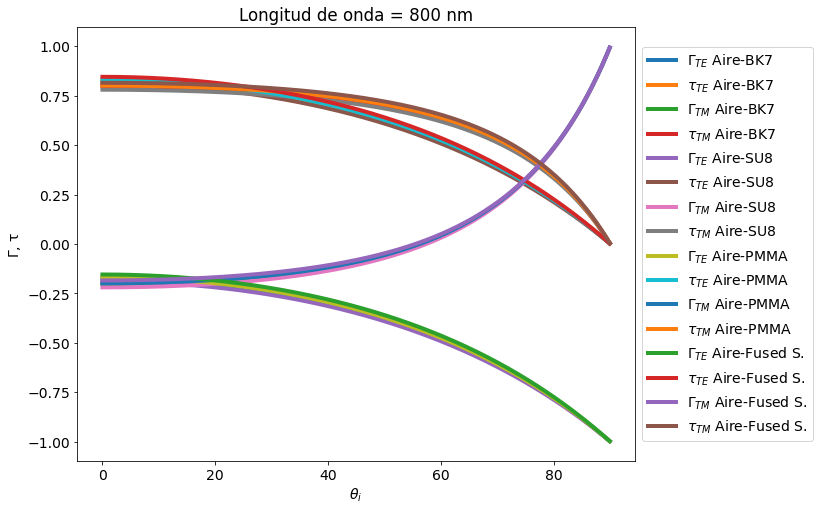

In [29]:
## Coeficientes de fresnel para longitud de onda de 800 nm

n1 = 1.00027505 # aire
n2_1 = 1.5108 #BK7
n2_2 = 1.5633 # SU8
n2_3 = 1.4968 # PMMA
n2_4 = 1.4533 # Fused S.

#indice de refraccion relativo
n_1 = n2_1/n1
n_2 = n2_2/n1
n_3 = n2_3/n1
n_4 = n2_4/n1

theta_i = np.arange(0,90,0.1) #grados
theta_t = 20 # grados

gamma_te_1 = (np.cos(theta_i * 3.1415926 / 180) - n_1 * np.cos(theta_t* 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_1 * np.cos(theta_t* 3.1415926 / 180)) 
tau_te_1 = (2 * np.cos(theta_i * 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_1 * np.cos(theta_t * 3.1415926 / 180))
gamma_tm_1 = (-n_1**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_1**2 - np.sin(theta_i * 3.1415926 / 180)**2))/(n_1**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_1**2 - np.sin(theta_i * 3.1415926 / 180)**2))
tau_tm_1 = (2*n_1 * np.cos(theta_i * 3.1415926 / 180))/(n_1**2 * np.cos(theta_i * 3.1415926 / 180) + np.sqrt(n_1**2 - np.sin(theta_i * 3.1415926 / 180)**2))

gamma_te_2 = (np.cos(theta_i * 3.1415926 / 180) - n_2 * np.cos(theta_t* 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_2 * np.cos(theta_t* 3.1415926 / 180)) 
tau_te_2 = (2 * np.cos(theta_i * 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_2 * np.cos(theta_t * 3.1415926 / 180))
gamma_tm_2 = (-n_2**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_2**2 - np.sin(theta_i * 3.1415926 / 180)**2))/(n_2**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_2**2 - np.sin(theta_i * 3.1415926 / 180)**2))
tau_tm_2 = (2*n_2 * np.cos(theta_i * 3.1415926 / 180))/(n_2**2 * np.cos(theta_i * 3.1415926 / 180) + np.sqrt(n_2**2 - np.sin(theta_i * 3.1415926 / 180)**2))

gamma_te_3 = (np.cos(theta_i * 3.1415926 / 180) - n_3 * np.cos(theta_t* 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_3 * np.cos(theta_t* 3.1415926 / 180)) 
tau_te_3 = (2 * np.cos(theta_i * 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_3 * np.cos(theta_t * 3.1415926 / 180))
gamma_tm_3 = (-n_3**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_3**2 - np.sin(theta_i * 3.1415926 / 180)**2))/(n_3**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_3**2 - np.sin(theta_i * 3.1415926 / 180)**2))
tau_tm_3 = (2*n_3 * np.cos(theta_i * 3.1415926 / 180))/(n_3**2 * np.cos(theta_i * 3.1415926 / 180) + np.sqrt(n_3**2 - np.sin(theta_i * 3.1415926 / 180)**2))

gamma_te_4 = (np.cos(theta_i * 3.1415926 / 180) - n_4 * np.cos(theta_t* 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_4 * np.cos(theta_t* 3.1415926 / 180)) 
tau_te_4 = (2 * np.cos(theta_i * 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_4 * np.cos(theta_t * 3.1415926 / 180))
gamma_tm_4 = (-n_4**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_4**2 - np.sin(theta_i * 3.1415926 / 180)**2))/(n_4**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_4**2 - np.sin(theta_i * 3.1415926 / 180)**2))
tau_tm_4 = (2*n_4 * np.cos(theta_i * 3.1415926 / 180))/(n_4**2 * np.cos(theta_i * 3.1415926 / 180) + np.sqrt(n_4**2 - np.sin(theta_i * 3.1415926 / 180)**2))


plt.plot(theta_i, gamma_te_1, "-", lw = 4, label="$\Gamma_{TE}$ Aire-BK7")
plt.plot(theta_i, tau_te_1, "-", lw = 4, label="$τ_{TE}$ Aire-BK7")
plt.plot(theta_i, gamma_tm_1, "-", lw = 4, label="$\Gamma_{TM}$ Aire-BK7")
plt.plot(theta_i, tau_tm_1, "-", lw = 4, label="$τ_{TM}$ Aire-BK7")

plt.plot(theta_i, gamma_te_2, "-", lw = 4, label="$\Gamma_{TE}$ Aire-SU8")
plt.plot(theta_i, tau_te_2, "-", lw = 4, label="$τ_{TE}$ Aire-SU8")
plt.plot(theta_i, gamma_tm_2, "-", lw = 4, label="$\Gamma_{TM}$ Aire-SU8")
plt.plot(theta_i, tau_tm_2, "-", lw = 4, label="$τ_{TM}$ Aire-SU8")

plt.plot(theta_i, gamma_te_3, "-", lw = 4, label="$\Gamma_{TE}$ Aire-PMMA")
plt.plot(theta_i, tau_te_3, "-", lw = 4, label="$τ_{TE}$ Aire-PMMA")
plt.plot(theta_i, gamma_tm_3, "-", lw = 4, label="$\Gamma_{TM}$ Aire-PMMA")
plt.plot(theta_i, tau_tm_3, "-", lw = 4, label="$τ_{TM}$ Aire-PMMA")

plt.plot(theta_i, gamma_te_4, "-", lw = 4, label="$\Gamma_{TE}$ Aire-Fused S.")
plt.plot(theta_i, tau_te_4, "-", lw = 4, label="$τ_{TE}$ Aire-Fused S.")
plt.plot(theta_i, gamma_tm_4, "-", lw = 4, label="$\Gamma_{TM}$ Aire-Fused S.")
plt.plot(theta_i, tau_tm_4, "-", lw = 4, label="$τ_{TM}$ Aire-Fused S.")

plt.xlabel("$θ_i$")
plt.ylabel("$\Gamma}$, τ")
plt.ylim(-1.1, 1.1)
plt.rcParams ["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size':14})
plt.legend()
plt.title('Longitud de onda = 800 nm')
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Reflectancia

/tmp/ipykernel_99/1069780542.py:15: RuntimeWarning: invalid value encountered in sqrt
  r_av_tm = ((-n_2**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_2**2 - np.sin(theta_i * 3.1415926 / 180)**2))/(n_2**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_2**2 - np.sin(theta_i * 3.1415926 / 180)**2)))**2


Text(0.5, 1.0, 'Reflectancia Bk7-Aire')

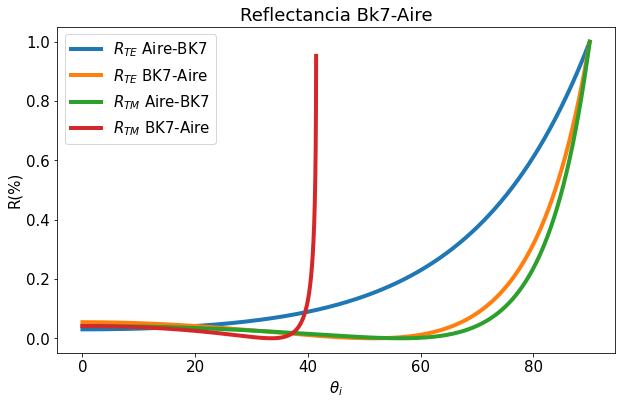

In [35]:
n1 = 1.00027505 # aire
n2_1 = 1.5108 #BK7

#indice de refraccion relativo
n_1 = n2_1/n1
n_2 = n1/n2_1

theta_i = np.arange(0,90,0.001) #grados
theta_t = 20 # grados

r_va = ((np.cos(theta_i * 3.1415926 / 180) - n_1 * np.cos(theta_t * 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_1 * np.cos(theta_t * 3.1415926 / 180)))**2 
r_av = ((np.cos(theta_i * 3.1415926 / 180) - n_2 * np.cos(theta_t * 3.1415926 / 180))/(np.cos(theta_i * 3.1415926 / 180) + n_2 * np.cos(theta_t * 3.1415926 / 180)))**2 

r_va_tm = ((-n_1**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_1**2 - np.sin(theta_i * 3.1415926 / 180)**2))/(n_1**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_1**2 - np.sin(theta_i * 3.1415926 / 180)**2)))**2
r_av_tm = ((-n_2**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_2**2 - np.sin(theta_i * 3.1415926 / 180)**2))/(n_2**2* np.cos(theta_i * 3.1415926 / 180)+np.sqrt(n_2**2 - np.sin(theta_i * 3.1415926 / 180)**2)))**2


plt.plot(theta_i, r_va, "-", lw = 4, label="$R_{TE}$ Aire-BK7")
plt.plot(theta_i, r_av, "-", lw = 4, label="$R_{TE}$ BK7-Aire")

plt.plot(theta_i, r_va_tm, "-", lw = 4, label="$R_{TM}$ Aire-BK7")
plt.plot(theta_i, r_av_tm, "-", lw = 4, label="$R_{TM}$ BK7-Aire")


plt.xlabel("$θ_i$")
plt.ylabel("R(%)")
plt.rcParams ["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size':15})
plt.legend()
plt.title('Reflectancia Bk7-Aire')

### Grafica de $\Delta \phi$

In [146]:
n1 = 1.00 # aire
n2_1 = 1.53 # vidrio

#indice de refraccion relativo
n_1 = n1/n2_1

theta_p = np.arctan(n1/n2_1) * 180/3.141592 #grados
theta_c = np.arcsin(n1/n2_1) * 180/3.141592 #grados

theta_i_a = np.arange(0,theta_p,0.01) #grados
theta_i_b = np.arange(theta_p,theta_c,0.01) #grados
theta_i_c = np.arange(theta_c,90,0.001) #grados

phi_te_a = 0*theta_i_a
phi_te_b = 0*theta_i_b
phi_te_c = -2*np.arctan( (np.sqrt(np.sin(theta_i_c * 3.141592 / 180)**2-n_1**2))/(np.cos(theta_i_c * 3.141592 / 180)) )

phi_tm_a = 0*theta_i_a
phi_tm_b = theta_i_b / theta_i_b * 3.1415926 #pi
phi_tm_c = -2*np.arctan( (np.sqrt(np.sin(theta_i_c * 3.141592 / 180)**2-n_1**2))/(n_1**2 *np.cos(theta_i_c * 3.141592 / 180)) ) + 3.141592 

/tmp/ipykernel_99/2588258468.py:16: RuntimeWarning: invalid value encountered in sqrt
  phi_te_c = -2*np.arctan( (np.sqrt(np.sin(theta_i_c * 3.141592 / 180)**2-n_1**2))/(np.cos(theta_i_c * 3.141592 / 180)) )
/tmp/ipykernel_99/2588258468.py:20: RuntimeWarning: invalid value encountered in sqrt
  phi_tm_c = -2*np.arctan( (np.sqrt(np.sin(theta_i_c * 3.141592 / 180)**2-n_1**2))/(n_1**2 *np.cos(theta_i_c * 3.141592 / 180)) ) + 3.141592


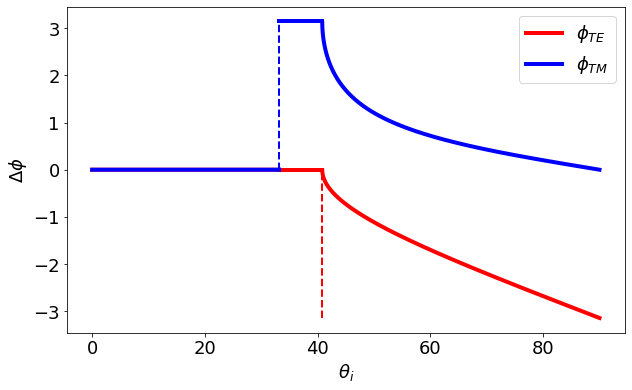

In [145]:
plt.plot(theta_i_a, phi_te_a , "-", color = 'red', lw = 4, label = '$\phi_{TE}$')
plt.plot(theta_i_b, phi_te_b , "-", color = 'red', lw = 4)
plt.plot(theta_i_c, phi_te_c , "-", color = 'red', lw = 4)

plt.plot(theta_i_a, phi_tm_a , "-", color = 'blue', lw = 4, label = '$\phi_{TM}$')
plt.plot(theta_i_b, phi_tm_b , "-", color = 'blue', lw = 4)
plt.plot(theta_i_c, phi_tm_c , "-", color = 'blue', lw = 4)

linea1 = np.arange(0.0001,3.14,0.01)
linea2 = np.arange(-3.141592,-0.00001,0.01)
x1 = theta_p * linea1 / linea1
plt.plot(x1, linea1 , "--", color = 'blue', lw = 2)

x2 = theta_c * linea2 / linea2
plt.plot(x2, linea2 , "--", color = 'red', lw = 2)

plt.xlabel("$θ_i$")
plt.ylabel("$\Delta \phi$")
plt.rcParams ["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size':18})
plt.legend()
